<a href="https://colab.research.google.com/github/ObadaAwwad/Investigate-a-Movie-Dataset/blob/main/Investigate_a_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project: Investigate a Dataset – [TMDB 5000 Movie Dataset](https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata)


## Table of Contents
1. Introduction  
2. Data Wrangling  
3. Exploratory Data Analysis (EDA)  
4. Conclusions


<a id='intro'></a>

## Introduction

This project explores the **TMDB 5000 Movie Dataset**, which contains information about **10,000 films** collected from *The Movie Database (TMDb)*.  
The dataset includes various details such as genres, cast, director, budget, revenue, user ratings, and popularity scores.  
Some columns, such as *cast* and *genres*, contain multiple values separated by a pipe (`|`) character, and a few contain unusual or missing entries that will need cleaning before analysis.

---

### Dataset Description

Below is a brief description of the main variables in the dataset:

- **id, imdb_id:** Unique identifiers for each movie.  
- **original_title:** The original title of the movie.  
- **release_date:** The date when the movie was released.  
- **cast, director:** Main actors and the director of the movie.  
- **genres, keywords:** Genres and related keywords (separated by `|`).  
- **runtime:** Duration of the movie in minutes.  
- **vote_average, vote_count:** Average user rating and total number of votes.  
- **popularity:** Popularity score from TMDb.  
- **budget, revenue:** Original budget and revenue in U.S. dollars.  
- **budget_adj, revenue_adj:** Budget and revenue adjusted to 2010 dollars (inflation-adjusted).

---

### Questions for Analysis

In this investigation, I aim to answer the following key questions:

1. How has the **popularity of different genres** changed over the years?  
2. What **factors** are most associated with higher movie revenues (e.g., budget, runtime, ratings)?  
3. How has the **number of movies released** each year changed over time?  
4. What **movie characteristics** are commonly found in films with **high revenues**?

In [ ]:
# Import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Enable inline plotting for visualizations
%matplotlib inline


<a id='wrangling'></a>

## Data Wrangling

In this section, I will **load the dataset**, **inspect its structure**, and **clean the data** to ensure it is ready for analysis.  
This process includes checking for missing values, incorrect data types, and potential inconsistencies in the dataset.


In [ ]:
# Load the dataset
df = pd.read_csv('tmdb-movies.csv')

# Display the first five rows
df.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [ ]:
#exploring the shape of data
df.shape

(10866, 21)

In [ ]:
# list all columns
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [ ]:
# info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [ ]:
# find number of unique values
df['id'].nunique()

10865

In [ ]:
# check for duplicate
df.duplicated().sum()

np.int64(1)

In [ ]:
df['genres'].value_counts().head(10)


,count
genres,
Comedy,712
Drama,712
Documentary,312
Drama|Romance,289
Comedy|Drama,280
Comedy|Romance,268
Horror|Thriller,259
Horror,253
Comedy|Drama|Romance,222


In [ ]:
# describe tha data
df.describe()


,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09



### Data Cleaning


<a id='cleaning'></a>

## Data Cleaning

While inspecting the dataset, I identified one duplicate record, which could bias the analysis by double-counting the same movie.  
Therefore, I removed duplicate rows.


After cleaning, the dataset is now ready for analysis, containing only valid and unique movie records.


In [ ]:
df.drop_duplicates(inplace=True)

df.duplicated().sum()

np.int64(0)

Additionally, some movies had a runtime value of 0 minutes, which is not realistic, and a number of records contained a budget or revenue of 0, indicating missing or incorrect financial data.  
These records were removed to ensure the accuracy of further analysis.

In [ ]:
# Remove rows with invalid or missing values in important columns
# Movies with zero runtime, budget, or revenue are not realistic, so we remove them.
df = df[(df['runtime'] > 0) & (df['budget'] > 0) & (df['revenue'] > 0)]

# Reset index for clarity
df.reset_index(drop=True, inplace=True)

df.shape


(3854, 21)

<a id='eda'></a>
## Exploratory Data Analysis

> In this section, I will explore the cleaned dataset to answer the research questions posed earlier. The analysis will include both descriptive statistics and visualizations to identify patterns and trends. For each research question


Define a function for plotting

### Research Question 1 (How has the popularity of different genres changed over the years?)

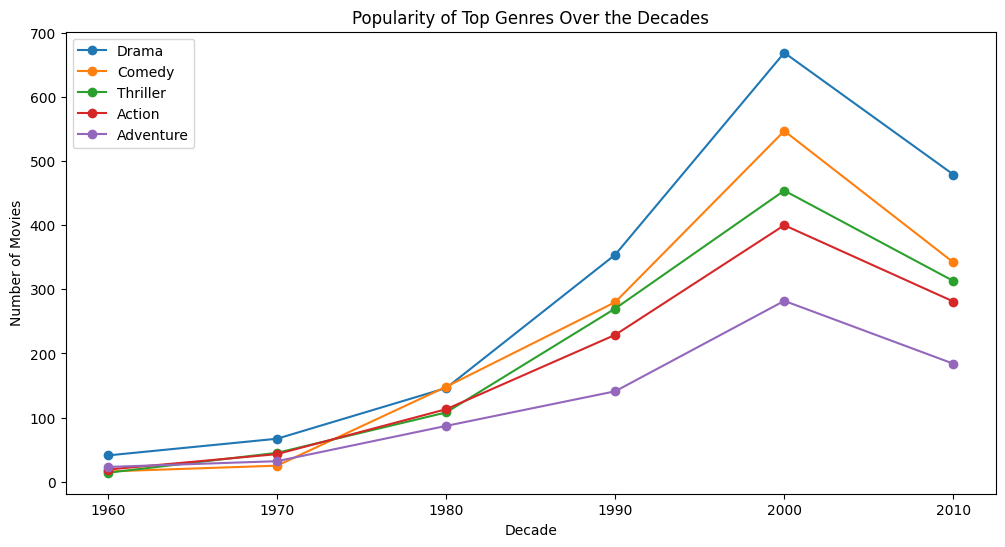

In [ ]:
# Copy and prepare dataset
genres_df = df.copy()
genres_df['genres'] = genres_df['genres'].str.split('|')
genres_df = genres_df.explode('genres')

# Create a 'decade' column (e.g., 1990s, 2000s, etc.)
genres_df['decade'] = (genres_df['release_year'] // 10) * 10

# Count number of movies per genre per decade
genre_trend = genres_df.groupby(['decade', 'genres']).size().reset_index(name='movie_count')

# Identify top 5 genres overall
top_genres = genre_trend.groupby('genres')['movie_count'].sum().sort_values(ascending=False).head(5).index
top_genre_trend = genre_trend[genre_trend['genres'].isin(top_genres)]

# Plot the trend
plt.figure(figsize=(12,6))
for genre in top_genres:
    subset = top_genre_trend[top_genre_trend['genres'] == genre]
    plt.plot(subset['decade'], subset['movie_count'], marker='o', label=genre)
plt.title('Popularity of Top Genres Over the Decades')
plt.xlabel('Decade')
plt.ylabel('Number of Movies')
plt.legend()
plt.show()


### Research Question 2 (What **factors** are most associated with higher movie revenues (e.g., budget, runtime, ratings))?  

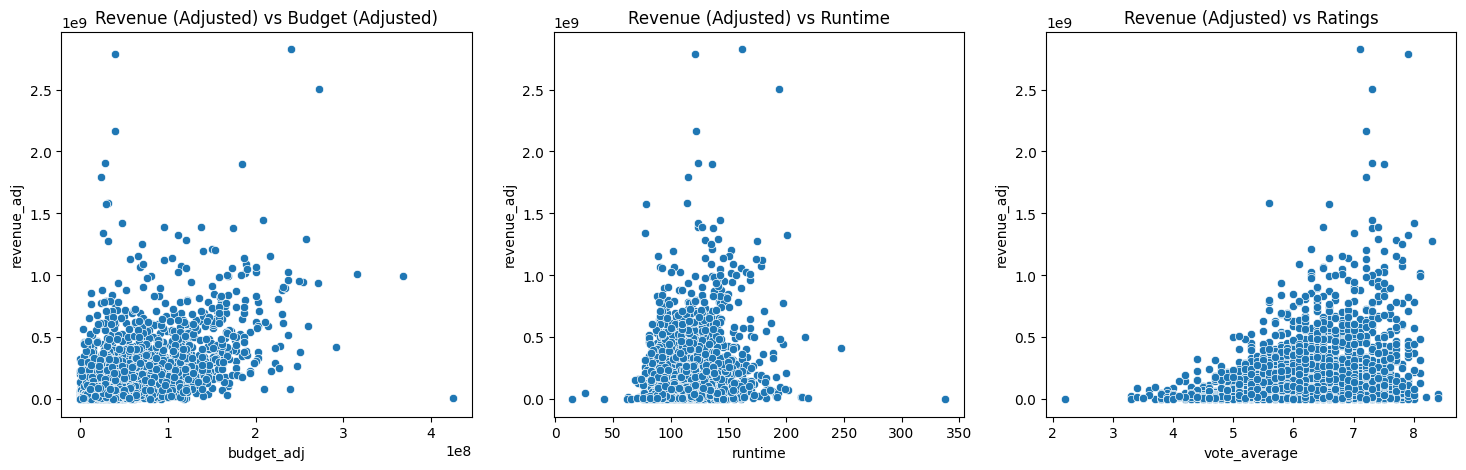

,budget_adj,runtime,vote_average,revenue_adj
budget_adj,1.000000,0.333976,0.036803,0.570451
runtime,0.333976,1.000000,0.351712,0.280505
vote_average,0.036803,0.351712,1.000000,0.266844
revenue_adj,0.570451,0.280505,0.266844,1.000000


In [ ]:
# Scatter plots with adjusted financial values
fig, axes = plt.subplots(1, 3, figsize=(18,5))

sns.scatterplot(ax=axes[0], data=df, x='budget_adj', y='revenue_adj')
axes[0].set_title('Revenue (Adjusted) vs Budget (Adjusted)')

sns.scatterplot(ax=axes[1], data=df, x='runtime', y='revenue_adj')
axes[1].set_title('Revenue (Adjusted) vs Runtime')

sns.scatterplot(ax=axes[2], data=df, x='vote_average', y='revenue_adj')
axes[2].set_title('Revenue (Adjusted) vs Ratings')

plt.show()

# Correlation values (using adjusted data)
df[['budget_adj', 'runtime', 'vote_average', 'revenue_adj']].corr()


relationship with revenue (0.57), suggesting that movies with higher production budgets tend to earn significantly more.
Runtime and ratings also show mild positive correlations with revenue, indicating that longer and well-rated films may perform slightly better financially, though the effect is less pronounced than budge

### Research Question 3 (How has the **number of movies released** each year changed over time?)

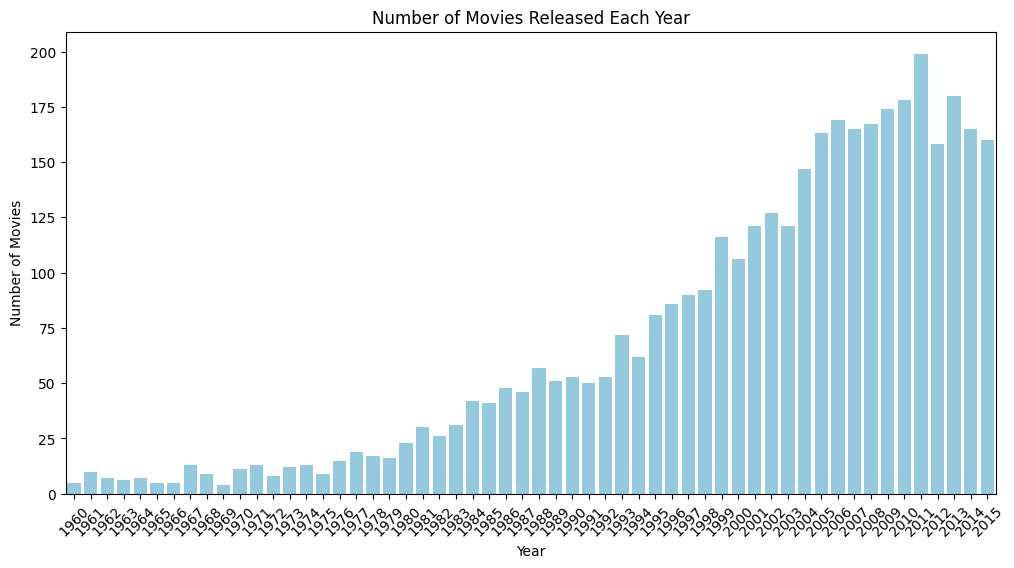

In [ ]:
# Number of movies released each year
movies_per_year = df.groupby('release_year').size().reset_index(name='movie_count')

# Plot
plt.figure(figsize=(12,6))
sns.barplot(data=movies_per_year, x='release_year', y='movie_count', color='skyblue')
plt.title('Number of Movies Released Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()


The bar chart shows a clear upward trend in the number of movies released each year.
Starting from the early 21st century, the film industry witnessed a significant increase in production.

### Research Question 4 (Which **genres** are most common among **high-revenue movies**?)

/tmp/ipython-input-827772270.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_revenue_movies['genres'] = high_revenue_movies['genres'].str.split('|')


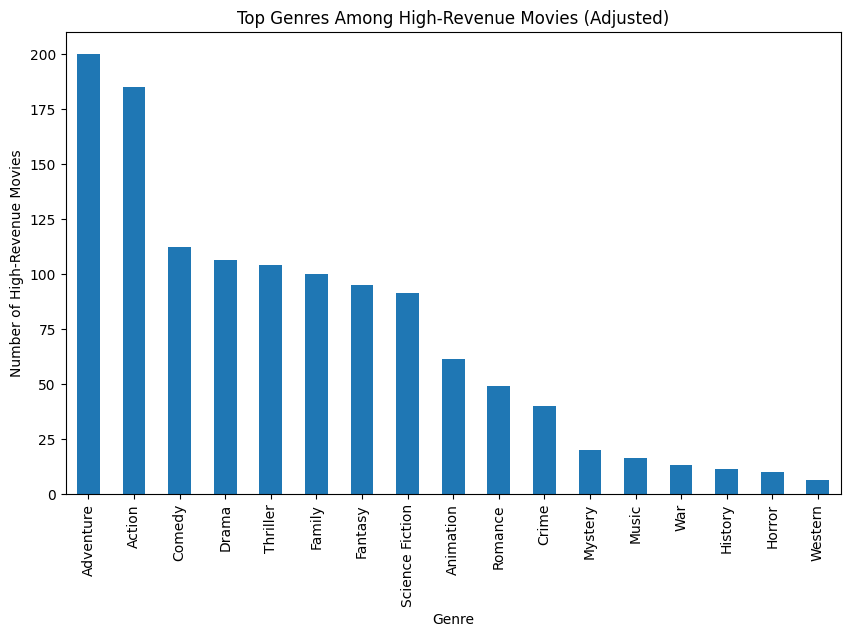

In [ ]:
# Define threshold for top 10% movies by adjusted revenue
high_rev_threshold = df['revenue_adj'].quantile(0.9)

# Filter only the top 10%
high_revenue_movies = df[df['revenue_adj'] >= high_rev_threshold]

# Split and explode genres
high_revenue_movies['genres'] = high_revenue_movies['genres'].str.split('|')
high_revenue_movies = high_revenue_movies.explode('genres')

# Count most frequent genres among top-grossing films
top_genres_high_rev = high_revenue_movies['genres'].value_counts()

# Plot
top_genres_high_rev.plot(kind='bar', figsize=(10,6))
plt.title('Top Genres Among High-Revenue Movies (Adjusted)')
plt.xlabel('Genre')
plt.ylabel('Number of High-Revenue Movies')
plt.show()


<a id='conclusions'></a>
## Conclusions

From the analysis, several clear insights were obtained:

1. Popularity of Genres Over Time
Movie production increased steadily starting from the 1990s, with Drama dominating as the most produced genre, followed by Comedy, Thriller, Action, and Adventure.
However, between 2000 and 2010, the total number of movies slightly decreased, indicating a temporary slowdown in production.

2. Factors Associated with Higher Revenues
The correlation analysis revealed that budget has the strongest positive relationship with revenue (correlation ≈ 0.57).
This means movies with higher budgets tend to generate higher revenues.
Runtime (≈ 0.28) and average rating (≈ 0.27) also show moderate positive correlations, suggesting that longer and better-rated movies generally perform better financially.

3. Annual Movie Production Trend
The number of movies released each year shows a clear upward trend overall — especially since the early 2000s, where film production rose significantly, reflecting the rapid growth of the global film industry.

4. Common Genres Among High-Revenue Movies
Movies with the highest revenues are most commonly Adventure, Action, and Comedy, followed closely by Drama and Thriller.
This suggests that audiences are more drawn to visually engaging and emotionally dynamic genres that balance excitement and storytelling.


## Further Research

**1- Award Influence**:
Investigating the relationship between winning major awards (Oscars, Golden Globes, etc.) and box office success could reveal how critical recognition affects financial performance.

**2- Audience Engagement**:
Integrating data from IMDb or Rotten Tomatoes could help clarify how viewer ratings and reviews correlate with revenue and popularity.

**3-Regional Patterns**:
Since this dataset does not include country data, a future study could explore differences between regions — for instance, how Western vs. Asian markets differ in genre preferences.

**4-Marketing and Distribution Impact**:
Examining variables such as marketing budgets, release platforms (cinema vs. streaming), and global reach could provide a more complete understanding of what drives movie success.


## Limitations

* Some records contain missing or zero values for important fields such as budget, runtime, or revenue, which may slightly affect accuracy.

* The dataset does not specify currency, meaning comparisons across countries may be imprecise.

* Inflation adjustments (budget_adj, revenue_adj) are approximate and based on 2010 values, which might not perfectly reflect real-world financial differences.

* Popularity scores are subjective and may not fully capture audience satisfaction or cultural impact.

* Other influential factors (like marketing, release timing, or actor reputation) were not included in the dataset.
